# Laboratorio métodos numéricos

In [ ]:
import random
import matplotlib.pyplot as plt

##Funcion de Monte Carlo
Funcion que retorna un diccionario cuya llave es la cantidad de cartas requeridas para hacer blackjack y su valor la cantidad acumulada de aciertos para esa cantidad de cartas

In [ ]:
def blackjack(iterations, deck_in, init_deck = []):
  results = {}
  success = 0
  for i in range(iterations):
    deck = deck_in.copy()
    my_cards = init_deck.copy()
    card_count = 0
    while(sum(my_cards)<21):
      card = random.choice(deck)
      my_cards.append(card)
      deck.remove(card)
      card_count += 1
    if(sum(my_cards)==21):
      success += 1
      if card_count not in results:
        results[card_count] = 0  
      results[card_count] += 1
  return results

##Funcion de estadisticas
Función para imprimir las estadisticas arrojadas por la funcion de Monte Carlo

In [ ]:
def stats(result, iterations):
  sum_mean = 0
  print("21 probability: ", sum(result.values())/iterations)
  for key in result:
    sum_mean += key * result[key]
  try:
    print("Average card number: ", sum_mean/sum(result.values()))
  except ZeroDivisionError:
    print("Average card number: 0")
  try:
    print("Max card number: ", max(result.keys()))
  except ValueError:
    print("Max card number: 0")

##Punto 1:
Estimate the probability of getting a 21, the average number of cards required to complete 21 and plot the experimental distribution of the number of card required to complete 21 drawing cards sequentially from a shuffled Spanish 48-card deck with card values **[1,2,3,4,5,6,7,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]** and from a shuffled Poker 52-card with card values **[1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]** using Montecarlo with 10 millions simulations.

Poker deck:
21 probability:  0.1453
Average card number:  3.227666896077082
Max card number:  8


<BarContainer object of 7 artists>

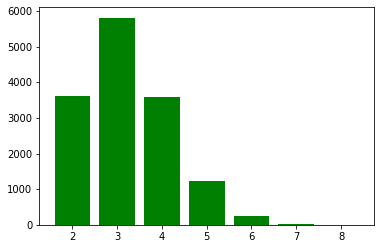

In [ ]:
pocker_deck = [1,2,3,4,5,6,7,8,9,10,11,12,13]*4
iterations = int(100e3)
result = blackjack(iterations, pocker_deck)
print("Poker deck:")
stats(result, iterations)
plt.bar(result.keys(), result.values(), 0.8, color='g')

Spanish deck:
21 probability:  0.16017
Average card number:  3.737091839920085
Max card number:  9


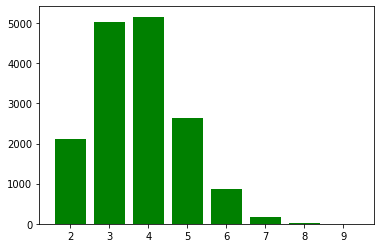

In [ ]:
spanish_deck = [1,2,3,4,5,6,7,10,11,12]*4
result = blackjack(iterations, spanish_deck)
print("Spanish deck:")
stats(result, iterations)
plt.bar(result.keys(), result.values(), 0.8, color='g');

##Punto 2:
Estimate the probability of getting a 21, the average number of cards required to complete 21 and plot the experimental distribution of the number of card required to complete 21 drawing cards sequentially from a shuffled Spanish 48-card deck with card values **[1,2,3,4,5,6,7,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]** and from a shuffled Poker 52-card deck with card values **[1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]** using Montecarlo with 10 millions simulations.

Poker deck:
21 probability:  0.13961
Average card number:  3.575961607334718
Max card number:  8


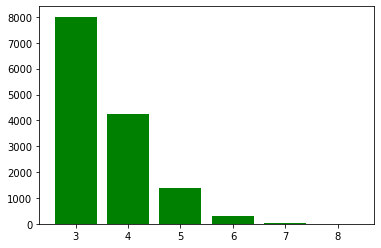

In [ ]:
pocker_deck_m10 = [1,2,3,4,5,6,7,8,9,10,10,10,10]*4
iterations = int(100e3)
result_1 = blackjack(iterations, pocker_deck_m10)
print("Poker deck:")
stats(result_1, iterations)
plt.bar(result_1.keys(), result_1.values(), 0.8, color='g');

Spanish deck:
21 probability:  0.16584
Average card number:  3.9513989387361312
Max card number:  9


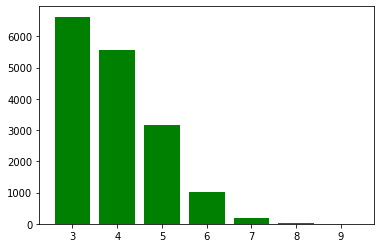

In [ ]:
spanish_deck_m10 = [1,2,3,4,5,6,7,10,10,10]*4
result = blackjack(iterations, spanish_deck_m10)
print("Spanish deck:")
stats(result, iterations)
plt.bar(result.keys(), result.values(), 0.8, color='g');

##Punto 3:
Estimate the probability of getting a 21, the average total number of cards required to complete 21 (including the three that you start with) and plot the experimental distribution of the number of card required to complete 21 with drawing cards sequentially from a shuffled Spanish 48-card deck with 3 10’s and a shuffled Poker 52-card deck with 4 10’s, assuming that you have in your hand the cards [7,7,5]ae and the remaining deck has n/2 cards. You can pick the n/2 cards in the remaining deck in whatever way you choose but with restriction that this has maximum two 7s and three 5, you have to keep the remaining deck fixed through the simulations, use Montecarlo with 10 millions simulations.

Poker deck:
21 probability:  0.08627
Average card number:  1.0590008114060507
Max card number:  2


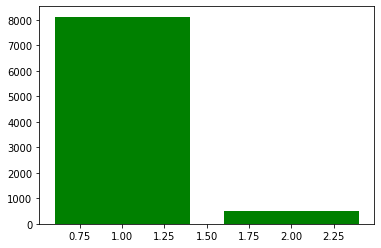

In [ ]:
init_deck = [7,7,5]
iterations = int(100e3)
pocker_deck_less = [1,2,3,4,6,8,9,10,10,10,10]*4 + [7,7,5,5,5]
result = blackjack(iterations, pocker_deck_less, init_deck)
print("Poker deck:")
stats(result, iterations)
plt.bar(result.keys(), result.values(), 0.8, color='g');

Spanish deck:
21 probability:  0.11587
Average card number:  1.074997842409597
Max card number:  2


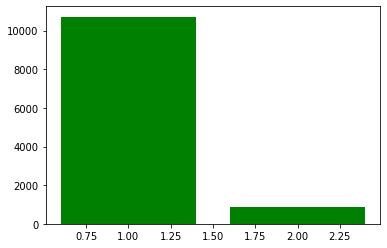

In [ ]:
spanish_deck_less = [1,2,3,4,6,10,10,10]*4 + [7,7,5,5,5]
result = blackjack(iterations, spanish_deck_less, init_deck)
print("Spanish deck:")
stats(result, iterations)
plt.bar(result.keys(), result.values(), 0.8, color='g');

##Punto 4:
Find two remaining decks with 8 cards for a Spanish 48-card deck with 3 10’s and for a Poker 52-card deck with 4 10’s; one remaining deck with 8 cards that has the highest probability of getting 21 (hot deck) and the other remaining deck with 8 cards that has the lowest probability of getting 21(cold deck). Assuming that you have in your hand the cards [7,7,5], calculate analytically the probabilities of getting a 21 for both the hot an cold deck, estimate this probabilities of getting a 21, the average total number of cards required to complete 21 (including the three that you start with) and plot the experimental distribution of the total number of card required to complete 21 (including the three that you start with) using Montecarlo with 10 millions simulations.

In [ ]:
prob_get_2 = 4/8
prob_get_first_1 = 4/8
prob_get_second_1 = 3/7
print("Calculated probability", prob_get_2 + (prob_get_first_1 * prob_get_second_1))

Calculated probability 0.7142857142857143


Hot deck:
21 probability:  0.71525
Average card number:  1.3010276127228242
Max card number:  2


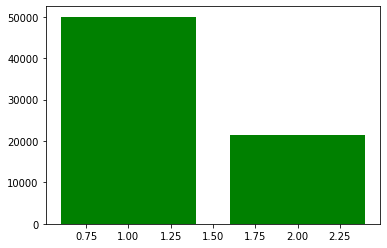

In [ ]:
init_deck = [7,7,5]
iterations = int(100e3)
hot_deck = [1,2]*4
result = blackjack(iterations, hot_deck, init_deck)
print("Hot deck:")
stats(result, iterations)
plt.bar(result.keys(), result.values(), 0.8, color='g');

Poker cold deck:
21 probability:  0.0
Average card number: 0
Max card number: 0


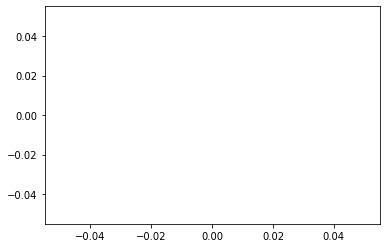

In [ ]:
poker_deck_cold = [3,4,6,8,9,10,10,10,10]*4 + [7,7,5,5,5]
result = blackjack(iterations, poker_deck_cold, init_deck)
print("Poker cold deck:")
stats(result, iterations)
plt.bar(result.keys(), result.values(), 0.8, color='g');

Spanich cold deck:
21 probability:  0.0
Average card number: 0
Max card number: 0


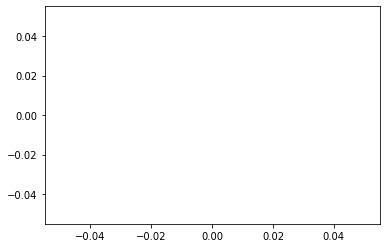

In [ ]:
spanish_deck_cold = [3,4,6,10,10,10]*4 + [7,7,5,5,5]
result = blackjack(iterations, spanish_deck_cold, init_deck)
print("Spanich cold deck:")
stats(result, iterations)
plt.bar(result.keys(), result.values(), 0.8, color='g');

##Punto 5:
Estimate the average amount of money (expected value) that Ben wins or losses on a weekend if Ben goes to Vegas every weekend (Friday, Saturday and Sunday), plays every weekend day 10 hours, each game takes 3 mins. Assume that for each game he gets two possibilities, in one he gets in his hand the cards [7,7,5] and a remaining hot deck with 8 cards in which case he bets \$1000 this happens with probability 1/10; in the other one he gets no cards in his hand a complete shuffled deck in which case he bets \$10, this happens with the remaining probability 9/10. Use 10000 Montecarlo simulations to estimated the expected amount of money that Ben wins or losses on a weekend for a Spanish 48-card deck with 3 10’s and for a Poker 52-card deck with 4 10’s.

La funcion ben_game calcula la cantidad estimada de dinero que puede ganar Ben

In [ ]:
def ben_game(deck_in, iterations, game_duration_mins = 3, gameplay_duration_hours = 10, 
             gameplay_duration_days = 3, hot_deck_prob = 1/10, cold_deck_prob = 9/10, 
             hot_deck_bet = 1000, cold_deck_bet = 10):
  gameplay_total = 60 * gameplay_duration_hours * gameplay_duration_days / game_duration_mins
  init_deck = [7,7,5]
  hot_deck = [1,2]*4
  bet = 0
  wallet = 0
  for game in range(int(gameplay_total)):
    if (random.random()>hot_deck_prob):
      result = blackjack(iterations, deck_in)
      bet = cold_deck_bet
    else:
      result = blackjack(iterations, hot_deck, init_deck)
      bet = hot_deck_bet
    prob_success = sum(result.values())/iterations
    if (random.random()<prob_success):
      wallet += bet
    else:
      wallet -= bet
  return wallet

In [ ]:
pocker_deck_m10 = [1,2,3,4,5,6,7,8,9,10,10,10,10]*4
spanish_deck_m10 = [1,2,3,4,5,6,7,10,10,10]*4
iterations = int(10e2)

print("Average amount with pocker deck: $", ben_game(pocker_deck_m10, iterations))
print("Average amount with spanish deck: $", ben_game(pocker_deck_m10, iterations))

Average amount with pocker deck: $ 29090
Average amount with spanish deck: $ 19130
